# Objectives
* Understand python objects in Python
* Know where to go to learn more

The [Python Tutorial](https://docs.python.org/3/tutorial/index.html) provides a thorough overview of python fundamentals.  The exercies here will go over a subset of this content: mainly focusing on aspects of python that are essential for science-based work.

In [1]:
""" Pre-load some necessary libraries """
# import plotting libraries
import pylab as PP
import matplotlib as mpl
from numpy import *

# use inline plotting
%matplotlib inline

# set default fonts
font = { 'family' : 'serif', \
        'size' : '15' }
mpl.rc('font', **font)
mpl.rc('axes', labelweight = 'bold') # needed for bold axis labels in more recent version of matplotlib

# Objects

In the last 7 weeks, we have encountered (perhaps without being fully aware) numerous objects in Python: lists, numpy arrays, strings, even integers.  One way that you have interacted with the object-based nature of lists is through the `append()` method, e.g.,:

```python
dataset = [] # define a list

for i in range(34):
    dataset.append(i) # append the current number to the list
```

** 1. Based on lectures in class, and the experience you have gained working with objects, what is an object? **

 * An object is an instance of a class. It is something in Python that has certain properties and fucntions associated with it.

# Classes and objects

The following code defines a simple class:

In [2]:
class NoisySineWave:
    
    # defines how an object is created from the class and what it does when first created
    def __init__(self, \
                 lower_bound = -pi,
                 upper_bound = pi, \
                 num_points = 512, \
                 noise_level = 0.1):
        """ Creates a sine wave, between x-values of lower_bound and upper_bound, with noise on top.
        
            input:
            ------
                lower_bound : the lower x value for which the sine wave is defined
                
                upper_bound : the upper x value for which the sine wave is defined
                
                num_points  : the number of points in the sine wave
                
                noise_level : the magnitude of noise to add to the sine wave
                
                
            output:
            -------
            
                creates a NoisySineWave object.  The sine wave is stored as object.wave and the
                x-values are stored as object.x        
        
        """
        
        # store the number of points
        self.N = num_points # N is an 'attribute of NoisySineWave objects
        
        # define the x-values
        self.x = linspace(lower_bound,upper_bound,num_points) # x is an attribute of NoisySinewave objects
        
        # define the sine wave
        pure_wave = sin(self.x)
        
        # define the noise
        noise = random.normal(loc=0.0,scale = noise_level,size=num_points)
        
        # create and store the noisy sine wave
        self.wave = pure_wave + noise
        
    # a method for generating a plot    
    def generate_plot(self):
        """ Generates a plot of the noisy sine wave. """
        fig,ax = PP.subplots(figsize=(6,4))
        ax.plot(self.x,self.wave)
        PP.show()
        
        return self # return a reference to the given object instance

And the following code creates two objects from the class:

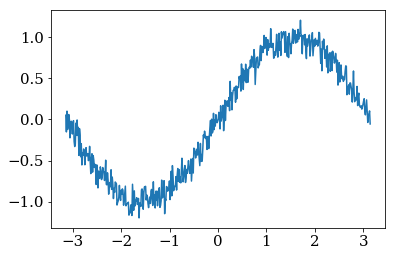

In [3]:
# create two instances of the NoisySineWave class; 
# one with a bit of noise, and one with a lot
slightly_noisy_wave = NoisySineWave()
very_noisy_wave = NoisySineWave(noise_level=1)

# generate a plot from the slightly noisy one.
slightly_noisy_wave.generate_plot()

** 2. What is the distinction between a class and an object? **

 * A class is the type of object, whereas the object is a particular instance of a particular class. To use an analogy, dog is like a class, but my pet dog Spot would be like an object.

** 3. What does the above class do?  How do you know? **

* The above class creates a sine wave object with a defined magnitude, level of noise, and number of points. I know what it does, because the information contained in the triple quotes specifies the properties of the object.

** 4. What role(s) does the period `.` play when using objects?  How would you access `N` in `very_noisy_wave`? **

 * The period is used to access the parameters or methods that are attributes of this class of object. To access 'N', you would write, very_noisy_wave.N

** 5. What do you think is the meaning/use of the `self` variable in the `__init__()` and `generate_plot()` methods? **

 * `self` refers to the specific object on which the methods `__init__()` and `generat_plot()` should operate when called.

# Functions vs methods

** 6. The `generate_plot()` function in the `NoisySineWave` class is a special type of function called a *method*.  What is the distinction between a function and a method? Try to apply the concept of `scope` as part of your answer. **

A method is a function that is associated with an object; methods always take a variable called `self` as their first argument, which gives them access to the internal state (e.g., variables, attributes, other methods) of an object.  A method is defined within the scope of a class (it is not visible, except as associated with an object), and it has access to variables/attributes/methods that are within the scope of the class.

** 7. In the cell below, use the `generate_plot()` method on the `very_noisy_wave` object. **

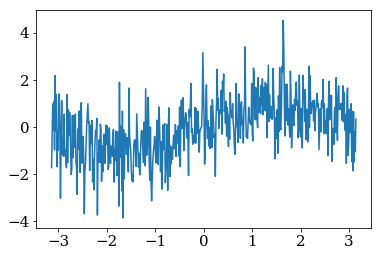

In [4]:
# use generate_plot() here
very_noisy_wave.generate_plot()

** 8. In the cell below, copy/paste the above `NoisySineWave` class definition, and modify it as follows: add a new method that adds additional noise to the existing sine wave.  Test it and plot the result. **

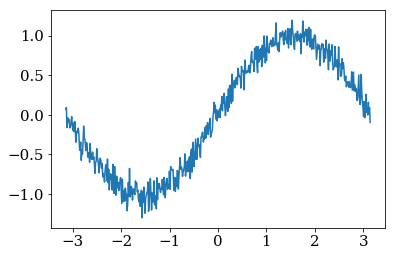

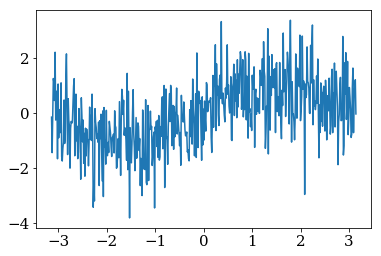

In [5]:
class NoisySineWave:
    
    # defines how an object is created from the class and what it does when first created
    def __init__(self, \
                 lower_bound = -pi,
                 upper_bound = pi, \
                 num_points = 512, \
                 noise_level = 0.1):
        """ Creates a sine wave, between x-values of lower_bound and upper_bound, with noise on top.
        
            input:
            ------
                lower_bound : the lower x value for which the sine wave is defined
                
                upper_bound : the upper x value for which the sine wave is defined
                
                num_points  : the number of points in the sine wave
                
                noise_level : the magnitude of noise to add to the sine wave
                
                
            output:
            -------
            
                creates a NoisySineWave object.  The sine wave is stored as object.wave and the
                x-values are stored as object.x        
        
        """
        
        # store the number of points
        self.N = num_points # N is an 'attribute of NoisySineWave objects
        
        # define the x-values
        self.x = linspace(lower_bound,upper_bound,num_points) # x is an attribute of NoisySinewave objects
        
        # define the sine wave
        pure_wave = sin(self.x)
        
        # define the noise
        noise = random.normal(loc=0.0,scale = noise_level,size=num_points)
        
        # create and store the noisy sine wave
        self.wave = pure_wave + noise
        
    # a method for generating a plot    
    def generate_plot(self):
        """ Generates a plot of the noisy sine wave. """
        fig,ax = PP.subplots(figsize=(6,4))
        ax.plot(self.x,self.wave)
        PP.show()
        
        return self # return a reference to the given object instance
    
    def add_noise(self, noise_level):
        noise_level = noise_level + 0.1
        
        #define noise
        noise = random.normal(loc=0.0, scale = noise_level, size=self.N)
        
        #add noise
        self.wave += noise
        #self.wave = self.wave + noise
        
        return self

#create the object
test_object = NoisySineWave()

#plot the current noisy sine
test_object.generate_plot()

#add noise
test_object.add_noise(0.9)

#generate test plot
test_object.generate_plot()


# Chaining

Class methods can return any type of value.  They can even return a reference to the given object (`self`).  This allows a style of coding called *chaining*.  Take the following example class.

The following `addANumber` class has methods `add_and_print_number` and `subtract_and_print_number` that returns `self`.  This means that the return value of either method is the same object from which the methods were called; therefore we can use `.` to access methods/attributes of that object.  This permits *chaining* of the functions as shown below.

In [6]:
class addANumber:
    
    number = 0
    
    def add_and_print_number(self,value):
        # equivalent to self.number = self.number + value
        self.number += value
        
        # print the current number's value
        print(self.number)
       
        # return a reference to the current object; this allows 'chaining'
        return self
    
    def subtract_and_print_number(self,value):
        # equivalent to self.number = self.number + value
        self.number -= value
        
        # print the current number's value
        print(self.number)
       
        # return a reference to the current object; this allows 'chaining'
        return self
        

# An example of chaining:
a_number = addANumber()
a_number = a_number.add_and_print_number(0).subtract_and_print_number(5).add_and_print_number(11).add_and_print_number(3)

# show that what is returned is an instance of addANumber
print(type(a_number))

0
-5
6
9
<class '__main__.addANumber'>


** 9. Explain, as though to a friend in class, what is happening in the ** `a_number = a_number.add_and_print_number(0)...` ** line**

 * in this line, the `*_and_print()` functions return a reference to the original `a_number` object, which allows the line to call the `*_and_print()` function in sequence on the same line.  From left to right, each time `add_and_print_number()` or `subtract_and_print_number()` methods are called, the internal state of `a_number` (it's `a_number.number` property) is updated and then printed.
 * a_number is starting with the number = 0 and printing that number and then .subtract_and_print_number(5) means that from the previous printed number of 0 the code will then subtract 5 and print the subtraction of 0-5 = -5. The value of -5 is printed and then used when it says .add_and_print_number (11) so -5+11 = 6 and the number 6 is printed. Finally the printed number 6 is used for .add_and_print_number(3) so the final number printed is 6+3=9
 * In this chain, each function is operating on the value of the previous function. Because each function includes printing the new value of self, the output is each number with the previous operation applied to it.

Strings, which are also objects have the useful (and chainable) method `replace()`, which can replace one character with another.  For example:

In [7]:
print("a ball is blue".replace('b','$'))

a $all is $lue


** 10. Use chaining to replace the following characters as follows in the string `weird_string` in the next cell (and then print the result):**

    '5' -> 'o'
    'G' -> 'u'
    '.' -> 's'
    '4' -> 'e'
    '*' -> 'a'
    '+' -> 'f'

In [8]:
weird_string = "I+ y5G c*n r4*d thi. m4..*g4, y5G h*v4 .Gcc4..+Glly ch*in4d .tring m4th5d. *. dir4ct4d.  C5ngr*tGl*ti5n.!"

# use chaining to do the character replacements above, all on one line.
# use chaining to do the character replacements above, all on one line.
# use .replace intrinsic as in example just before Q 10
decode_string = weird_string.replace('5','o').replace('G','u').replace('.','s') \
.replace('4','e').replace('*','a').replace('+','f').replace('ds','d.') # includes fix for the period at end of a sentence.

# print the result
print(decode_string)

If you can read this message, you have successfully chained string method. as directed.  Congratulations!
